In [45]:
import yfinance as yf
import ta
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")


In [54]:
data = yf.Ticker("NKE")
# print(data) ## Prints a ticker object
# print(data.info)
# print("--------------------")
# print("--------------------")
# print(data.history(period='max')) ## must be of the format 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max, etc.

nke_df = pd.DataFrame(data.history(period='max'))
nke_df_filtered = nke_df[nke_df.index >= '2010-01-01']
nke_df.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-02 00:00:00-05:00,0.125838,0.128573,0.125838,0.125838,100710400,0.0,0.0
1980-12-03 00:00:00-05:00,0.124469,0.124469,0.123102,0.123102,25177600,0.0,0.0
1980-12-04 00:00:00-05:00,0.127205,0.128573,0.127205,0.127205,22694400,0.0,0.0


In [47]:
nke_df['Intraday'] = nke_df['Close'] - nke_df['Open']
# Calculate Log Returns
nke_df['Log Return'] = np.log(nke_df['Close'] / nke_df['Close'].shift(1))
nke_df['Pct Change'] = nke_df['Close'].pct_change(periods=1)
nke_df.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Intraday,Log Return,Pct Change
Date,,,,,,,,,,
1980-12-02 00:00:00-05:00,0.125838,0.128573,0.125838,0.125838,100710400,0.0,0.0,0.000000,NaN,NaN
1980-12-03 00:00:00-05:00,0.124469,0.124469,0.123102,0.123102,25177600,0.0,0.0,-0.001368,-0.021983,-0.021744
1980-12-04 00:00:00-05:00,0.127205,0.128573,0.127205,0.127205,22694400,0.0,0.0,0.000000,0.032793,0.033336


In [48]:
## Some EDA
print(nke_df[['Close', 'Intraday','Volume']].describe())
print("-----------------------------")
nke_df_filtered = nke_df[nke_df.index >= '2010-01-01']
print(nke_df_filtered[['Close', 'Intraday','Volume']].describe())

print("-----------------------------")
# Calculate variance and standard deviation
variance = nke_df_filtered['Close'].var()
standard_deviation = nke_df_filtered['Close'].std()

print(f"Variance of daily returns: {variance}")
print(f"Standard Deviation of daily returns: {standard_deviation}")

              Close      Intraday        Volume
count  11159.000000  11159.000000  1.115900e+04
mean      24.575745      0.002046  1.166124e+07
std       36.943323      0.596451  1.036851e+07
min        0.075229     -6.281964  0.000000e+00
25%        1.159085     -0.046751  6.182400e+06
50%        5.651459      0.000000  8.968000e+06
75%       33.048843      0.054820  1.359220e+07
max      169.295288      6.245201  1.574456e+08
-----------------------------
             Close     Intraday        Volume
count  3820.000000  3820.000000  3.820000e+03
mean     64.772306     0.001641  8.768301e+06
std      38.776859     1.010778  5.546556e+06
min      12.672384    -6.281964  1.821900e+06
25%      31.504769    -0.338950  5.831375e+06
50%      55.185637     0.009748  7.513000e+06
75%      92.861086     0.371436  9.958300e+06
max     169.295288     6.245201  1.299670e+08
-----------------------------
Variance of daily returns: 1503.6447717159217
Standard Deviation of daily returns: 38.77685871

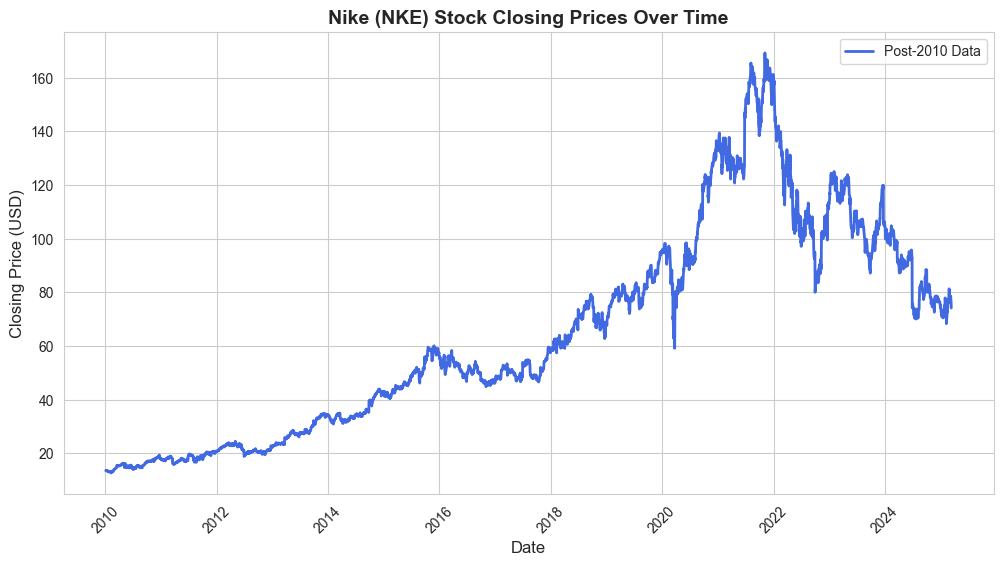

In [49]:
# Set seaborn style for better aesthetics
sns.set_style("whitegrid")  # Options: "darkgrid", "white", "whitegrid", "ticks"

# Create the figure
plt.figure(figsize=(12, 6))

# # Plot the full stock closing prices
# sns.lineplot(data=nke_df, x=nke_df.index, y='Close', 
#              label='Full Data', color='gray', linewidth=1.5, alpha=0.5)

# Filtered dataset from Jan 1, 2010
nke_df_filtered = nke_df[nke_df.index >= '2010-01-01']

# Plot the filtered stock closing prices
sns.lineplot(data=nke_df_filtered, x=nke_df_filtered.index, y='Close', 
             label='Post-2010 Data', color='royalblue', linewidth=2)

# Add labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.title('Nike (NKE) Stock Closing Prices Over Time', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend()

# Show the plot
plt.show()


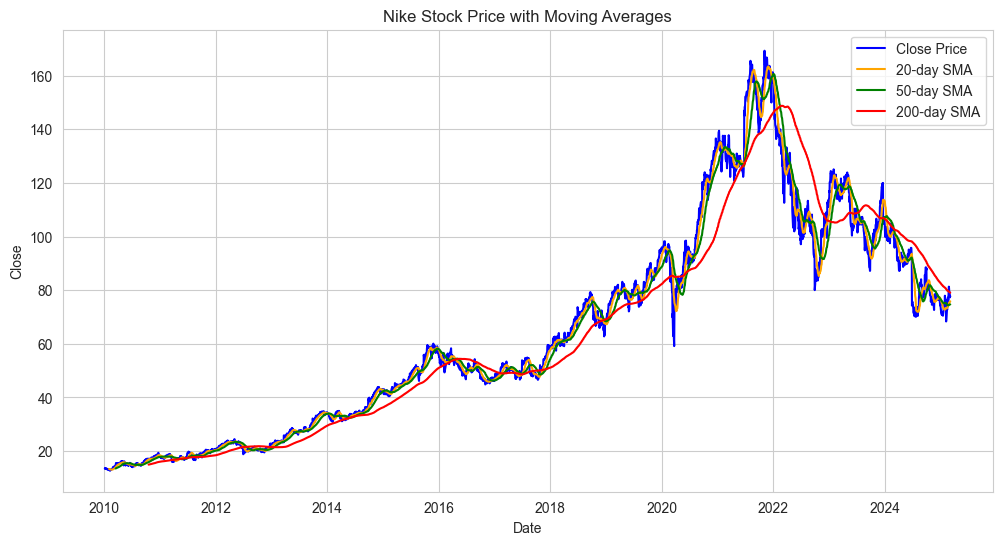

In [39]:
# Simple Moving Average (SMA)
nke_df_filtered = nke_df[nke_df.index >= '2010-01-01']
nke_df_filtered['SMA_20'] = nke_df_filtered['Close'].rolling(window=20).mean()
nke_df_filtered['SMA_50'] = nke_df_filtered['Close'].rolling(window=50).mean()
nke_df_filtered['SMA_200'] = nke_df_filtered['Close'].rolling(window=200).mean()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=nke_df_filtered.index, y=nke_df_filtered['Close'], label="Close Price", color="blue")
sns.lineplot(x=nke_df_filtered.index, y=nke_df_filtered['SMA_20'], label="20-day SMA", color="orange")
sns.lineplot(x=nke_df_filtered.index, y=nke_df_filtered['SMA_50'], label="50-day SMA", color="green")
sns.lineplot(x=nke_df_filtered.index, y=nke_df_filtered['SMA_200'], label="200-day SMA", color="red")
plt.title("Nike Stock Price with Moving Averages")
plt.show()

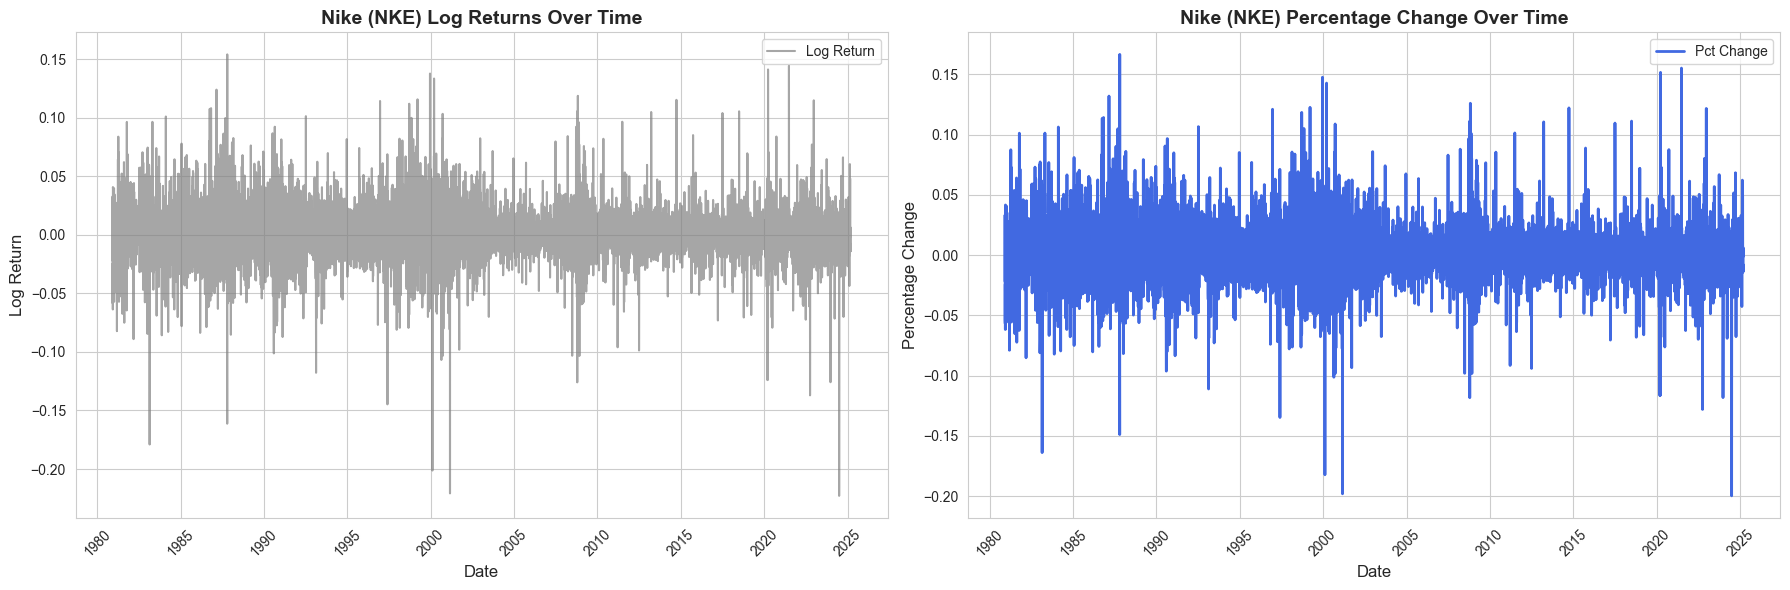

In [35]:
# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Two side-by-side plots

# 🔹 Plot 1: Log Return Over Time
sns.lineplot(ax=axes[0], data=nke_df, x=nke_df.index, y='Log Return', 
             label='Log Return', color='gray', linewidth=1.5, alpha=0.7)
axes[0].set_title("Nike (NKE) Log Returns Over Time", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Date", fontsize=12)
axes[0].set_ylabel("Log Return", fontsize=12)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# 🔹 Plot 2: Percentage Change Over Time
sns.lineplot(ax=axes[1], data=nke_df, x=nke_df.index, y='Pct Change', 
             label='Pct Change', color='royalblue', linewidth=2)
axes[1].set_title("Nike (NKE) Percentage Change Over Time", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Date", fontsize=12)
axes[1].set_ylabel("Percentage Change", fontsize=12)
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
nke_df_filtered = nke_df[nke_df.index >= '2010-01-01']
# Find the top 5 log return gains (largest positive)
top_gains = nke_df_filtered.nlargest(5, 'Log Return')[['Log Return']]
top_gains_dates = top_gains.index

# Find the top 5 log return losses (largest negative)
top_losses = nke_df_filtered.nsmallest(5, 'Log Return')[['Log Return']]
top_losses_dates = top_losses.index

# Display results
print("Top 5 Log Return Gains:")
print(top_gains)

print("/n Top 5 Log Return Losses:")
print(top_losses)

Top 5 Log Return Gains:
                           Log Return
Date                                 
2021-06-25 00:00:00-04:00    0.144373
2020-03-24 00:00:00-04:00    0.141284
2014-09-26 00:00:00-04:00    0.115342
2022-12-21 00:00:00-05:00    0.114926
2018-06-29 00:00:00-04:00    0.105528
/n Top 5 Log Return Losses:
                           Log Return
Date                                 
2024-06-28 00:00:00-04:00   -0.222905
2022-09-30 00:00:00-04:00   -0.137059
2023-12-22 00:00:00-05:00   -0.125854
2020-03-12 00:00:00-04:00   -0.124052
2020-03-16 00:00:00-04:00   -0.123638


Text(0.5, 1.0, 'Distribution of Nike Log Returns')

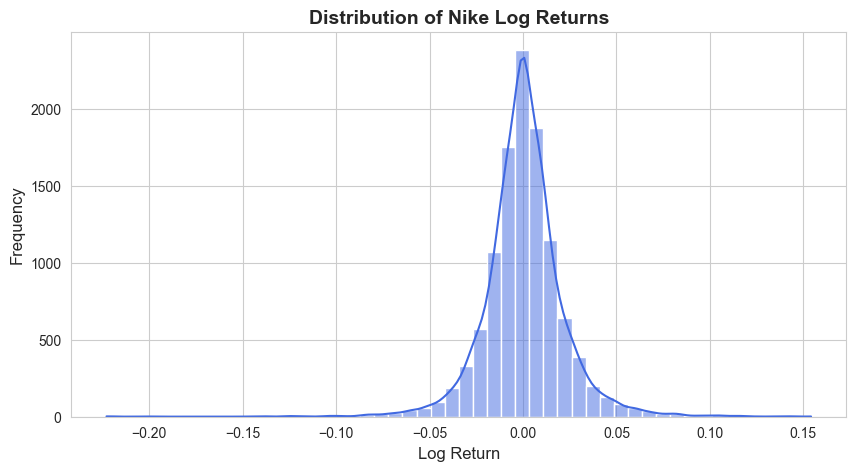

In [21]:
# Create histogram
plt.figure(figsize=(10, 5))
sns.histplot(nke_df['Log Return'], bins=50, kde=True, color="royalblue")

# Add labels and title
plt.xlabel("Log Return", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Nike Log Returns", fontsize=14, fontweight="bold")

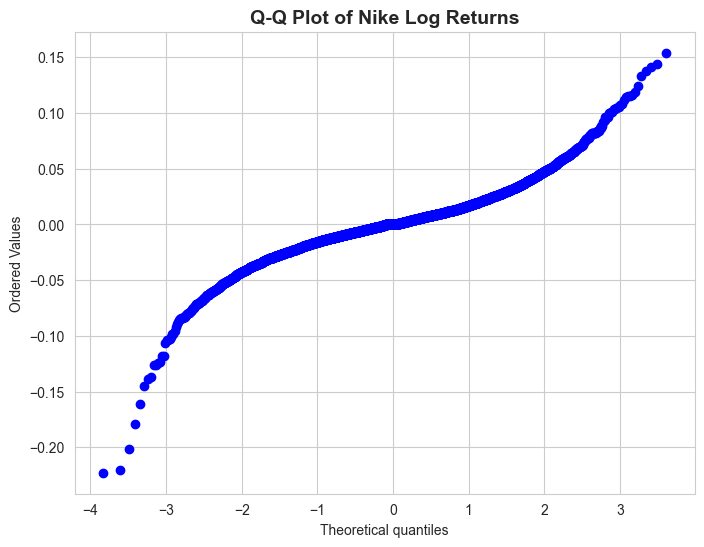

In [ ]:
##Returns are NOT normally distrubuted
# Create a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(nke_df['Log Return'], dist="norm", plot=plt)

# Add title
plt.title("Q-Q Plot of Nike Log Returns", fontsize=14, fontweight="bold")

# Show the plot
plt.show()

Text(0.5, 1.0, 'Nike (NKE) - Volume vs. Close Price')

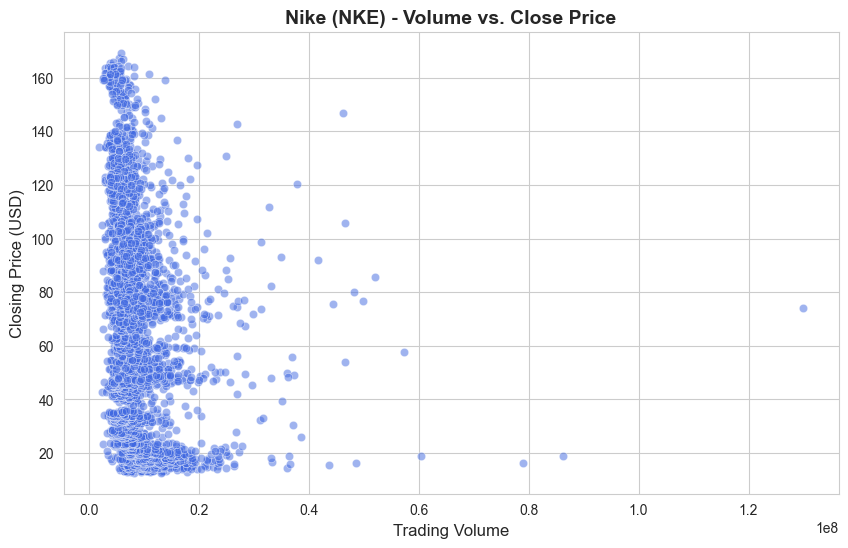

In [43]:
# Create figure
plt.figure(figsize=(10, 6))

# Scatterplot of Volume vs Close Price
sns.scatterplot(data=nke_df_filtered, x='Volume', y='Close', alpha=0.5, color='royalblue')

# Labels and title
plt.xlabel('Trading Volume', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.title('Nike (NKE) - Volume vs. Close Price', fontsize=14, fontweight='bold')

# Show plot

In [ ]:
##Using the TA package

# Calculate RSI (Relative Strength Index) - to measure the speed and magnitude of price changes, helping identify potential overbought or oversold conditions in an asset. 
# Overbought: RSI readings above 70 typically suggest an asset is overbought and may be due for a price correction. 
# Oversold: RSI readings below 30 often indicate an asset is oversold and could be poised for a price rebound. 
# Neutral: A value of 50 suggests a balance between bullish and bearish positions. 
nke_df_filtered['RSI'] = ta.momentum.RSIIndicator(nke_df_filtered['Close'], window=14).rsi()

# Calculate MACD (Moving Average Convergence Divergence)
macd_indicator = ta.trend.MACD(nke_df_filtered['Close'])
nke_df_filtered['MACD'] = macd_indicator.macd()
nke_df_filtered['MACD_Signal'] = macd_indicator.macd_signal()

# Calculate Bollinger Bands
bollinger = ta.volatility.BollingerBands(nke_df_filtered['Close'], window=20, window_dev=2)
nke_df_filtered['Bollinger_Upper'] = bollinger.bollinger_hband()
nke_df_filtered['Bollinger_Lower'] = bollinger.bollinger_lband()
nke_df_filtered['Bollinger_Middle'] = bollinger.bollinger_mavg()

# Display first few rows
print(nke_df_filtered[['Close', 'RSI', 'MACD', 'MACD_Signal', 'Bollinger_Upper', 'Bollinger_Lower']].head())

                               Close  RSI  MACD  MACD_Signal  Bollinger_Upper  \
Date                                                                            
2010-01-04 00:00:00-05:00  13.509630  NaN   NaN          NaN              NaN   
2010-01-05 00:00:00-05:00  13.563383  NaN   NaN          NaN              NaN   
2010-01-06 00:00:00-05:00  13.480692  NaN   NaN          NaN              NaN   
2010-01-07 00:00:00-05:00  13.612996  NaN   NaN          NaN              NaN   
2010-01-08 00:00:00-05:00  13.586122  NaN   NaN          NaN              NaN   

                           Bollinger_Lower  
Date                                        
2010-01-04 00:00:00-05:00              NaN  
2010-01-05 00:00:00-05:00              NaN  
2010-01-06 00:00:00-05:00              NaN  
2010-01-07 00:00:00-05:00              NaN  
2010-01-08 00:00:00-05:00              NaN  


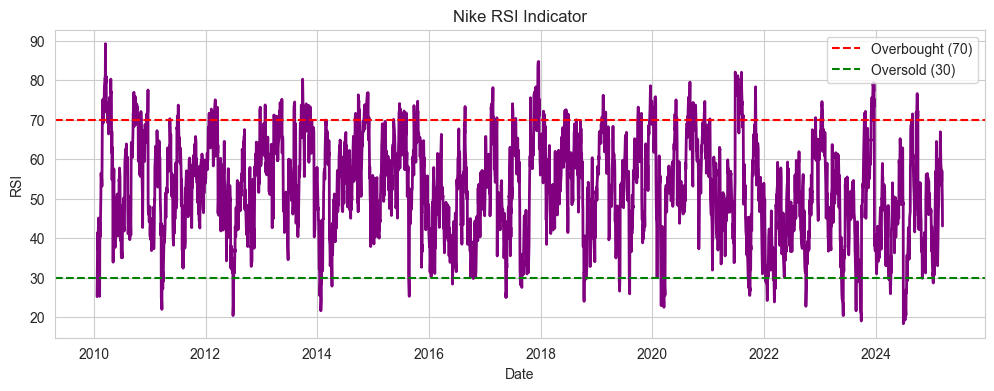

In [56]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=nke_df_filtered, x=nke_df_filtered.index, y='RSI', color='purple', linewidth=2)
plt.axhline(70, color='red', linestyle='dashed', label="Overbought (70)")
plt.axhline(30, color='green', linestyle='dashed', label="Oversold (30)")
plt.title('Nike RSI Indicator')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

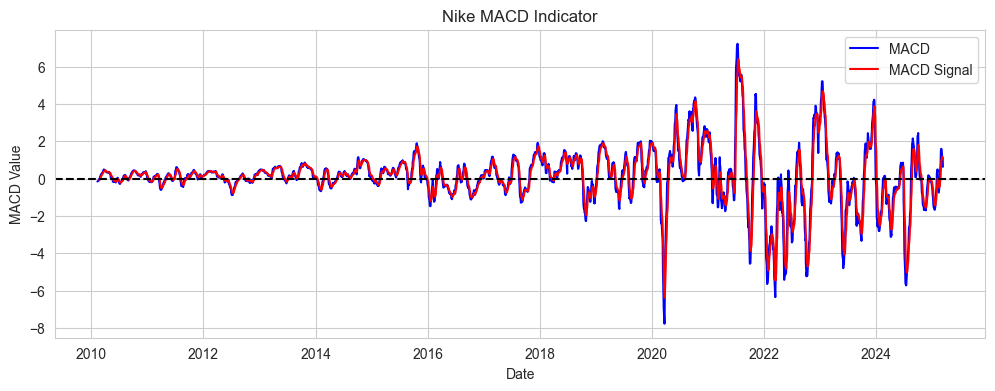

In [57]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=nke_df_filtered, x=nke_df_filtered.index, y='MACD', label='MACD', color='blue')
sns.lineplot(data=nke_df_filtered, x=nke_df_filtered.index, y='MACD_Signal', label='MACD Signal', color='red')
plt.axhline(0, color='black', linestyle='dashed')
plt.title('Nike MACD Indicator')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.show()

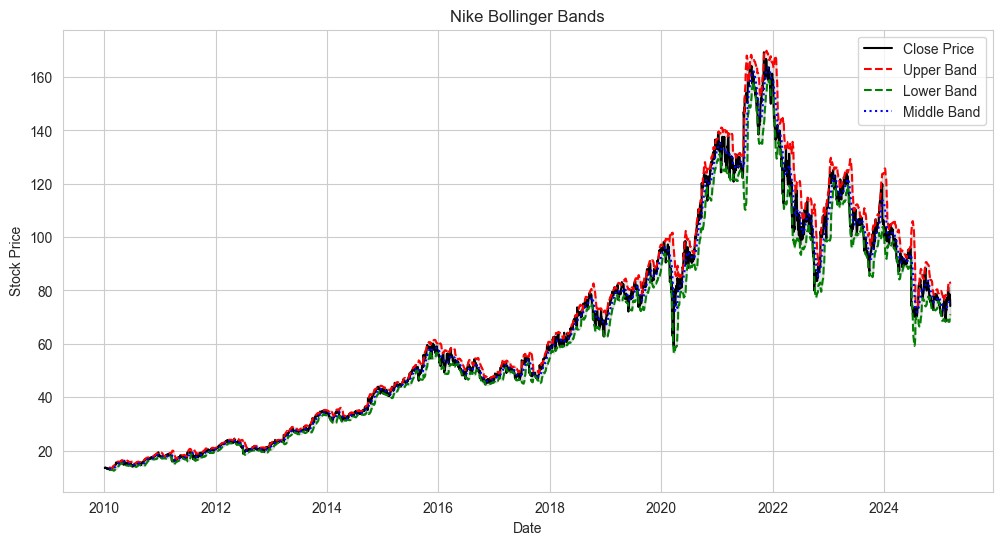

In [59]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=nke_df_filtered, x=nke_df_filtered.index, y='Close', label='Close Price', color='black')
sns.lineplot(data=nke_df_filtered, x=nke_df_filtered.index, y='Bollinger_Upper', label='Upper Band', color='red', linestyle='dashed')
sns.lineplot(data=nke_df_filtered, x=nke_df_filtered.index, y='Bollinger_Lower', label='Lower Band', color='green', linestyle='dashed')
sns.lineplot(data=nke_df_filtered, x=nke_df_filtered.index, y='Bollinger_Middle', label='Middle Band', color='blue', linestyle='dotted')
plt.fill_between(nke_df_filtered.index, nke_df_filtered['Bollinger_Lower'], nke_df_filtered['Bollinger_Upper'], color='gray', alpha=0.2)
plt.title('Nike Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()